<a href="https://colab.research.google.com/github/paul028/myJupyterNotebook/blob/master/CIFAR10_MLPv2(Underfit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install livelossplot
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from livelossplot.keras import PlotLossesCallback
import numpy as np


  Stored in directory: /root/.cache/pip/wheels/bf/66/07/e3129f723b6b36ee4affde650ad6843fceaf5c2fa5dc29b986
Successfully built livelossplot


Using TensorFlow backend.


In [2]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" %
                     (i, loss[i], acc[i], val_loss[i], val_acc[i]))


if __name__ == '__main__':


    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0
    nb_epoch = 125
    batch_size = 128
    
    nb_classes = len(np.unique(y_train))
    nb_epoch=125
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()


170500096/170498071 [==============================] - 9s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
____________________

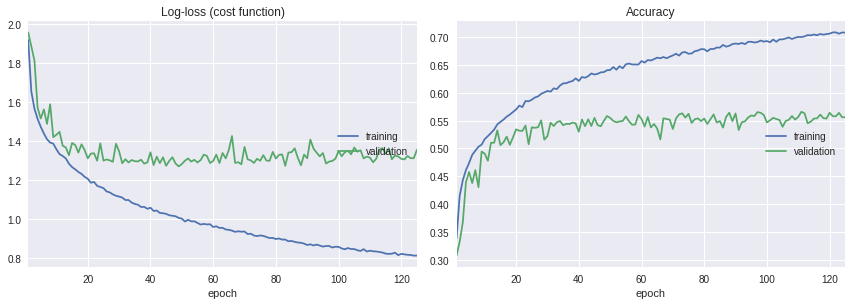

Log-loss (cost function):
training   (min:    0.810, max:    1.915, cur:    0.811)
validation (min:    1.268, max:    1.955, cur:    1.353)

Accuracy:
training   (min:    0.338, max:    0.708, cur:    0.708)
validation (min:    0.307, max:    0.566, cur:    0.556)


In [3]:

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test),callbacks=[PlotLossesCallback()])

    save_history(history, 'history.txt')


In [4]:
    loss, acc = model.evaluate(X_test, Y_test,verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

Test loss: 1.3532731561660767
Test acc: 0.5561
